<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Absenteeism time in hours</p><br>


<p style="font-family: Arial; font-size:3em;color:#2462C0; font-style:bold">
Introduction </p>
<br>

Every work place can't help but have workers who, depending on various reasons, decide to be absent. Why is that? Is there a more recurring reason across various subjects?

According to Forbes, Absenteeism is an employee’s intentional or habitual absence from work where excessive absences can equate to decreased productivity and can have a major effect on company finances, morale and other factors. There are different types of reasons that can lead to an absence at work such as Illness, Childcare, etc. 

This project will be looking at a dataset from Brazil where records of absenteeism at work were collected from July 2007 to July 2010 at a courier company. The goal is to **find out how the company can increase productivity by decreasing absenteeism at work**.

A few questions to consider along the way:

* Which areas of life affect Abseenteeism(i.e: Work or Family..)?

* Is there an obvious relationship between reason for absence and absenteeism?

* Between regression models and Classification models, is there a better model for our problem?



# Data Exploration 

This dataset consists of **740 observations** and **21 features** with:
*  **8 Categorical features**: Reason for absence,Month of Absence, Day of the week, Seasons, Disciplinary failure,Education,Social drinker and Social smoker 

*  **13 numerical features**: ID, Transportation Expense , Distance from Residence to Work,Service time, Age , Work load , Hit target , Son, Pet, Weight, Height, Body mass index and Absenteeism time in hours 



**Attribute Information:**

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


In [262]:
#Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#First 10 rows
absent=pd.read_csv('./Absenteeism_at_work - Absenteeism_at_work.csv',sep=',')
print (type(absent))
absent.head(5)

<class 'pandas.core.frame.DataFrame'>


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


# Pre Processing

In order to build a good model, we need to have some understanding of the dataset using the Exploratory Data Analysis Process (EDA). For the first step, we will be looking at any necessary data cleaning.

In [263]:
#changing a float 64 to int64
absent['Work load Average/day ']=absent['Work load Average/day '].astype('str')
absent['Work load Average/day ']=absent['Work load Average/day '].str.replace(',', '')
absent['Work load Average/day ']=pd.to_numeric(absent['Work load Average/day '], errors='coerce')
#absent['Work load Average/day ']


In [264]:
absent.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

Thankfully, our dataset does not have any missing values and column **'Work load Average/day'** is tranformed from **float 64 to int 64** in order to be used for analysis. 

After that, a general analysis with descriptive statistics is made in order to capture the shape or tendency of each column. 

In [592]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


A few Observation Points:
* We can tell that the maximum value of 'Absenteeism time in hours  is **120** which is more than **9 standard deviations away from the mean!**

* The minimum values for **Reason for absence and Month of absence are 0's (unexpected)**. 

A closer look of these 2 columns is taken:

In [266]:
len(absent[absent['Absenteeism time in hours']==0])

44

In [267]:
len(absent[absent['Reason for absence']==0])

43

In [268]:
absent[absent['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219,...,0,1,1,0,0,1,77,175,25,0


* A closer inspection of those two columns reveals that all the 0's in both **Absenteeism time in hours,Month of absence and Reason for absence columns** correpond to **Absenteeism time in hours=0** . If this conclusion were to represent every employee who didn't take any absent days, the Day of the week column shouldn't be populated. I decided to categorize these **44 rows as outliers**. 

* Doing so also takes out all the **Disciplinary failure==1** leaving us with only Disciplinary failure==0. This means that this feature is no longer needed for the analysis.


The rest of the analysis will be looking at the non zero values of Absenteeism with a new dataset called **allabsents**

In [516]:
#new dataset with no Absenteeism time in hours=0 and Disciplinary failure

allabsents=absent[absent['Absenteeism time in hours']!=0]
allabsents=allabsents.drop(['Disciplinary failure'],axis=1)

Before looking at specific statistics for each variable, a heatmap gives an overall sense of a correlation between features. 

* The most positive correlations are: Service and Body mass Index,Weight and Body mass Index,  Age and Service time 
* The most negative correlations are: Reason for absence and Disciplinary failure, Month of Absence and Hit Target 

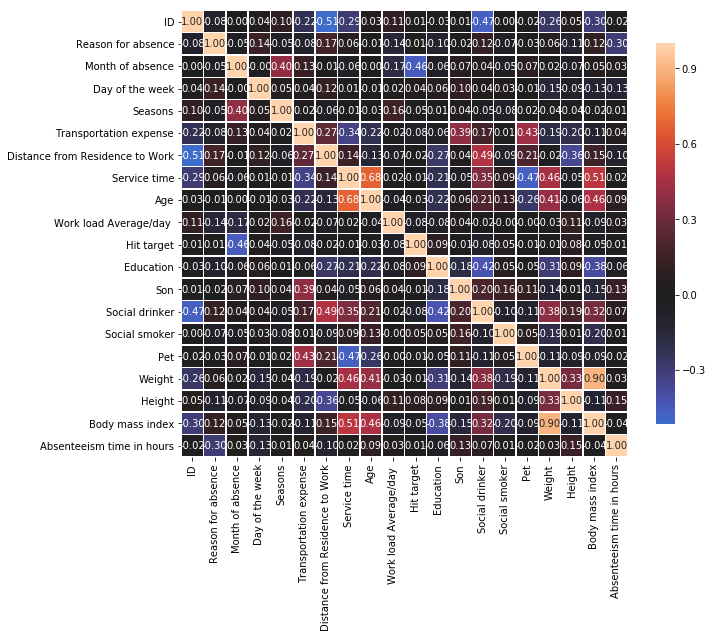

In [270]:
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(allabsents)

After that, a statistical focus looks at the dynamics of employees according to Age, Service time and Absenteeism time in hours

* Most workers are in between their late 20's and early 40's. On top of that, most employees have between 10 to 18 years of service time.

It is worth noticing a few characteristics of the Absenteeism time in hours column: 
* The plot is more skewed to the right where most values are less than 80 hrs of absence. In fact, **61% of employees have been absent for less than 8hrs** and **29% of them absent for exactly 8hrs**. Hence **91% of Absenteeism time in hours is explained by ony 8 or less hours of absenteeism**.
* There is a trend in Absenteeism time in hours. After 7hrs, there is mostly an **8hr difference (or 1 day)** between each reported absence. 

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


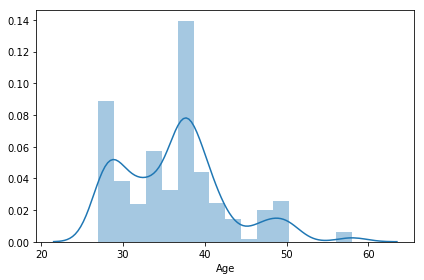

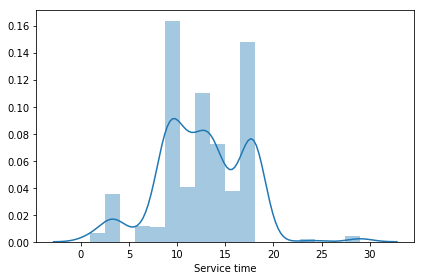

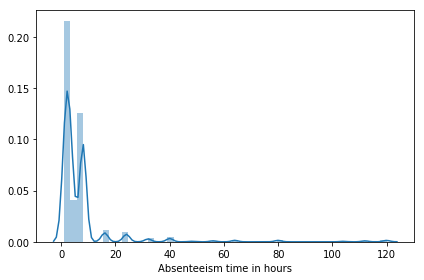

In [524]:
col=['Age','Service time','Absenteeism time in hours']
for i in col:
    sns.distplot(allabsents[i])
    plt.tight_layout()
    plt.show()

Another interesting column is **Reason for absence** with its 28 levels  with each number explaining the reason for absence. The column had originally categorical input that was converted into numerical input. Full explanation of each level is under attribute information. 

* Most common reasons were the categories outside of the ICD (International Code of Diseases) meaning that the most reasons were non serious diseases such as :patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28). These 7 categories were used by 62% of employees.
* The 2 categories within ICD with relatively high numbers are **13:Diseases of the musculoskeletal system and connective tissue and 19:Injury, poisoning and certain other consequences of external causes**. These two seem like they could be related to injuries one gets from this type of industry. Someone who is always doing deliveries for a long period of time is more likely to be affected.
* Surprising how only a few absences are related to birthing or children related.

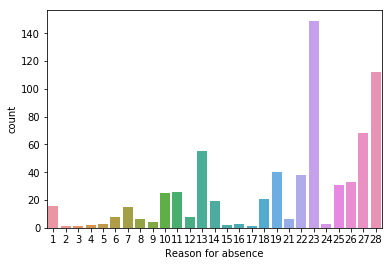

In [525]:
sns.countplot(x='Reason for absence',data=allabsents)

With this information, I wanted to analyze how depending on the reason, insights from other features can be found: Is there a specific category of reasons with less absenteeism?

I decided to create two categories of Reason for absence where one class represents ICD and the other non ICD reason.

In [531]:
bo=[]
for i in allabsents['Reason for absence']:
    if i<22:
        bo.append(0)
    else:
        bo.append(1)
allabsents['newreason']=bo

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


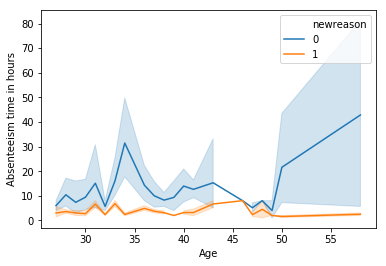

In [552]:
sns.lineplot(x='Age',y='Absenteeism time in hours',hue='newreason',data=allabsents)

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


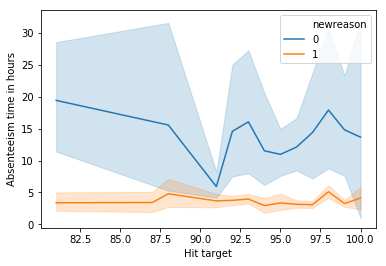

In [553]:
sns.lineplot(x='Hit target',y='Absenteeism time in hours',hue='newreason',data=allabsents)

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


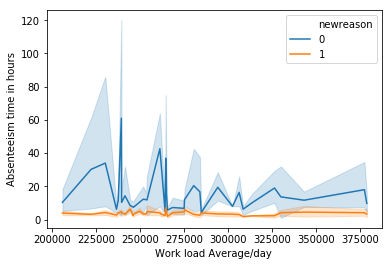

In [544]:
sns.lineplot(x='Work load Average/day ',y='Absenteeism time in hours',hue='newreason',data=allabsents)

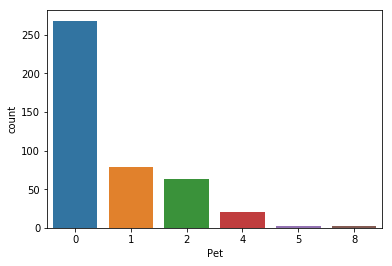

In [591]:
sns.countplot(x='Pet',data=allabsents[allabsents['newreason']==1])

The above plots show how both Age, Hit target and Work load Average/day have high absenteeism time in hours for ICD group and low absenteeism time in hours for non ICD group.

I also explored other categorical columns such as education and social drinker.

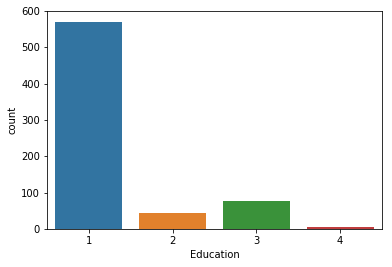

In [284]:
sns.countplot(x='Education',data=allabsents)

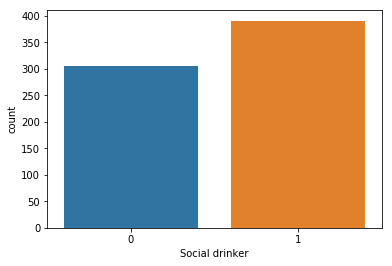

In [285]:
sns.countplot(x='Social drinker',data=allabsents)

The next steps is to normalize our data. A few ways were used in this process:
- Log transform and normalization for  the skewed depeendent variable Absenteeism time in hours
- One Hot Encoding for independent categorical variables
- StandardScaler() for all independent variables

In [287]:
#normalization
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


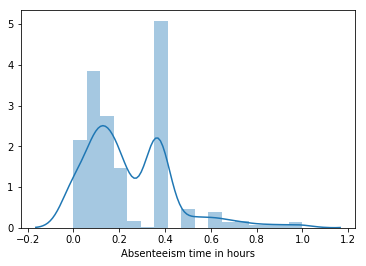

In [288]:
#Log transform our Y component
absent_time=allabsents['Absenteeism time in hours']
log_absent_time=np.log(absent_time+1)
norm_log_absent_time= normalize(log_absent_time)

sns.distplot(norm_log_absent_time)
#norm_log_absent_time.describe()

In [289]:
#OneHotEncoding for categorical features
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler

feat=['Reason for absence','Work load Average/day ','Day of the week', 'Age', 'Social drinker', 'Weight', 'Son','Body mass index','Height','Hit target']
#fe=coolio[['Son', 'Age','Weight', 'Body mass index','Service time','Height','Work load Average/day ','Hit target']]

encoder = OneHotEncoder(categorical_features=[0,2,4])
X_features_values = encoder.fit_transform(allabsents[feat]).toarray()


# Model Evaluations

After looking at the multiple ways of how Absenteeism time is influenced by features like Absenteeism time in hours and Work load average per day, I wanted to test and see how supervised models ,both regression and Classification, could pick up these tendencies and find the most prominent features.

For Regression models, I explored Lasso Regression, Ridge Regressions, Linear Regression, Decision Trees and Random Forest.RMSE and R^2 are my evaluation metrics in order to see model performance.


## Splitting Data

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report,r2_score,roc_curve
from math import sqrt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 

In [291]:
X=StandardScaler().fit_transform(X_features_values)
Y=norm_log_absent_time

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=324)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(487, 41) (487,)
(209, 41) (209,)


## Cross Validation

In order to optimize our results, I used GridSearchCV, a method where parametersare optimized by cross-validation.

**Linear,Lasso,Ridge,Random Forest Regression**

In [292]:
#CROSS VALIDATION WITH LASSO REGRESSION
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters={'alpha':[1e-4,1e-3,1e-2,1,5]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=324)
lasso_regressor.fit(X,Y)
print(lasso_regressor.best_params_)
#print(lasso_regressor.best_score_)


/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha': 0.001}


In [249]:
#CROSS VALIDATION WITH RIDGE REGRESSION
ridge = Ridge()
parameters={'alpha':[1e-8,1e-4,1e-3,1e-2,1,5,10,20,30]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-0.024701747983802404


In [250]:
#CROSSVALIDATION WITH RANDOM FOREST
random=RandomForestRegressor()
estimators={'n_estimators':[100,150,300,500,800]}
random_regressor=GridSearchCV(random,estimators,scoring='neg_mean_squared_error',cv=5)
random_regressor.fit(X,Y)
print(random_regressor.best_params_)
print(random_regressor.best_score_)

{'n_estimators': 800}
-0.022912241684939362


In [28]:
#CROSSVALIDATION WITH DECISION TREE
decision=DecisionTreeRegressor()
estimators={'max_depth':[2,3,5,10,100]}
decision_regressor=GridSearchCV(decision,estimators,scoring='neg_mean_squared_error',cv=5)
decision_regressor.fit(X,Y)
print(decision_regressor.best_params_)
print(decision_regressor.best_score_)

{'max_depth': 5}
-0.01789593617429371


## Models for Regression

After that, I created a function including all models while giving R^2 and RMSE values for each. As seen below, Random forest has the best score. It is interesting to see that Lasso and Ridge Regression have a similar score. Unfortunately, all scores do not tell us much about our data.

In [293]:
#Putting all models together 
def modeleval(xtrain,ytrain,x,y):
    #Ridge
    u=Ridge(alpha=30).fit(xtrain,ytrain)
    y_ridge=u.predict(x)
    RMSE_ridge=sqrt(mean_squared_error(y_true=y,y_pred=y_ridge))
    #lasso
    u=Lasso(alpha=0.001).fit(xtrain,ytrain)
    y_lasso=u.predict(x)
    RMSE_lasso=sqrt(mean_squared_error(y_true=y,y_pred=y_lasso))
    #linear
    lm = LinearRegression().fit(xtrain, ytrain)
    Y_linear = lm.predict(x)
    RMSE_linear=sqrt(mean_squared_error(y_true=y,y_pred=Y_linear))
    mse=mean_squared_error(y_true=y,y_pred=Y_linear)
    #decision tree
    regressor=DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
    Y_regre=regressor.predict(x)
    RMSE_regre=sqrt(mean_squared_error(y_true=y,y_pred=Y_regre))
    
    #RandomForest
    random=RandomForestRegressor(n_estimators=800,random_state=42).fit(xtrain, ytrain)
    Y_random=random.predict(x)
    #RMSE random
    RMSE_random=sqrt(mean_squared_error(y_true=y,y_pred=Y_random))
    print('Ridge Regression score:',u.score(x,y),', RMSE:',RMSE_ridge)
    print('Lasso Regression score:',u.score(x,y),', RMSE:',RMSE_lasso)
    print('Linear Regression score:',lm.score(x,y),',  RMSE:',RMSE_linear)
    print('Decision tree score:',regressor.score(x,y),',  RMSE:',RMSE_regre)
    print('Random Forest Regressor score:',random.score(x, y),'RMSE:',RMSE_random)
    #print('Logistic Regression score:',',  RMSE:',RMSE_logi)

In [294]:
modeleval(X_train,Y_train,X_test,Y_test)

Ridge Regression score: 0.42818485185302224 , RMSE: 0.14828891852048146
Lasso Regression score: 0.42818485185302224 , RMSE: 0.14773396815320505
Linear Regression score: -1.2733441437365961e+26 ,  RMSE: 2204577814935.491
Decision tree score: 0.3627625566321938 ,  RMSE: 0.15595639163395886
Random Forest Regressor score: 0.44741858785503097 RMSE: 0.14522810517218124


Looking at our residuals and scatter points, we can see that a classifiction model is probably going to perform better. In fact, we can see that our X values on the scatter plot displays more specific values than continuous ones.

Text(0,0.5,'Residuals')

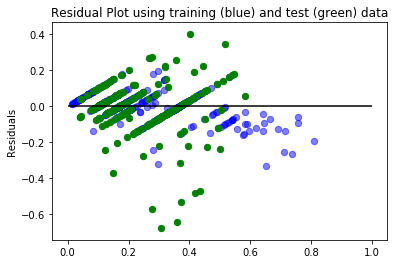

In [295]:
#residual
lm1 =RandomForestRegressor(n_estimators=100,random_state=0).fit(X_train,Y_train)
plt.scatter(lm1.predict(X_train),lm1.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm1.predict(X_test),lm1.predict(X_test)-Y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=1)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

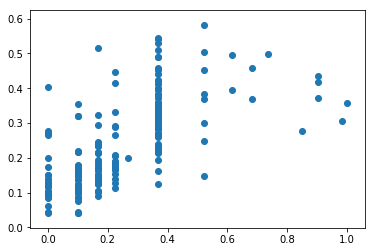

In [296]:
plt.scatter(Y_test,lm1.predict(X_test))

## Classification

For Classification models, I went ahead and categorized my **Absenteeism time in hours** column in two classes.

- h<8: for all employees who missed less than 8hrs of work 
- h>=8: for all employees who missed more than 8hrs of work. I decided to combine 8 hours or more since h>8 accounted for less than 10% of the data.


Note:
A few variations made to the models:

- Categorized Reason for absence into 2 classes, where the first one is ICD reasons and the second one were non ICD ones
- Categorized Reason for absence into putting similar categories together such as respiratory and digestive.

However, both cases decreased the performance of the model instead of increasing it.

In [554]:
aba=[]
for i in allabsents['Absenteeism time in hours']:
    if i<8:
        aba.append(0)
    else:
        aba.append(1)
allabsents['newabsent']=aba


 pd.get_dummies is used for creating dummy variable for categorical variables. Similar approach to OneHotEncoder.

In [582]:
de=pd.get_dummies(allabsents['Reason for absence'],prefix='Reason')
da=pd.get_dummies(allabsents['Month of absence'],prefix='Month')
pp=pd.get_dummies(allabsents['Social drinker'],prefix='soc')
pj=pd.get_dummies(allabsents['Social smoker'],prefix='smo')
pa=pd.get_dummies(allabsents['Day of the week'],prefix='day')
px=pd.get_dummies(allabsents['Seasons'],prefix='smo')
rr=pd.get_dummies(allabsents['Education'],prefix='edu')

fe=allabsents[['Son','Age','Weight', 'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']]

x_features=pd.concat([fe,de,da,pp,pj,pa,rr],axis=1)


In [583]:
XX=x_features
YY=allabsents['newabsent']

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3,random_state=324)
print (XX_train.shape, YY_train.shape)
print (XX_test.shape, YY_test.shape)

(487, 61) (487,)
(209, 61) (209,)


## Models for Classification

Decision trees, RandomForest and Logistic Regression with RMSE, R^2 and AUC score as evaluation metrics. 

In [584]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score,f1_score,roc_auc_score, roc_curve

In [585]:
#Putting all models together 
def modeleval(xtrain,ytrain,x,y):
    #decision tree
    regressor=DecisionTreeRegressor(max_depth=3).fit(xtrain, ytrain)
    Y_regre=regressor.predict(x)
    RMSE_regre=sqrt(mean_squared_error(y_true=y,y_pred=Y_regre))
    #RandomForest
    ra=RandomForestClassifier(n_jobs=-1,n_estimators=300,random_state=42)
    random=ra.fit(xtrain, ytrain)
    Y_random=random.predict(x)
    y_hat = random.predict_proba(x)[::,1]
    fpr, tpr,_ = roc_curve(y,  y_hat)
    auc = roc_auc_score(y, y_hat)
    #RMSE random
    RMSE_random=sqrt(mean_squared_error(y_true=y,y_pred=Y_random))
    #LogisticRegression
    logi=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(xtrain, ytrain)
    Y_logi=logi.predict(x)
    y_hat1 = logi.predict_proba(x)[::,1]
    fpr, tpr,_ = roc_curve(y,  y_hat1)
    auc1 = roc_auc_score(y, y_hat1)
    #Logi RMSE
    RMSE_logi=sqrt(mean_squared_error(y_true=y,y_pred=Y_logi))
    print('Decision tree score:',regressor.score(x,y),',  RMSE:',RMSE_regre)
    print('RanForest accuracy score:',random.score(x, y),',AUC score:',auc,' RMSE:',RMSE_random)
    print('LogiReg accuracy score:',logi.score(x,y),', AUC score:',auc1,'  RMSE:',RMSE_logi)

In [586]:
modeleval(XX_train,YY_train,XX_test,YY_test)

Decision tree score: 0.5188414477973493 ,  RMSE: 0.3386932997803416
RanForest accuracy score: 0.8325358851674641 ,AUC score: 0.9343671980026887  RMSE: 0.4092237955355674
LogiReg accuracy score: 0.6076555023923444 , AUC score: 0.4631265603994623   RMSE: 0.6263740875927544


I decided to pick Random Forest as my main model since it has better scores. Let us have a look into which features have the most importance.

In [587]:
random=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
fity=random.fit(XX_train, YY_train)
Y_random=random.predict(XX_test)
y_hat = random.predict_proba(XX_test)[::,1]
pd.DataFrame(random.feature_importances_,
                                   index = XX.columns,columns=['importance']).sort_values('importance', ascending=False)

,importance
Work load Average/day,0.074908
Reason_23,0.071364
Reason_28,0.057815
Hit target,0.053479
Service time,0.044107
Age,0.041386
Distance from Residence to Work,0.040247
Weight,0.039577
Body mass index,0.038135
Height,0.035834


With this new information, I ran my Random Forest model one more time with only the most importantant features. A better score was obtained.

In [581]:
fp=['Reason_28','Reason_23','Age','Service time', 'Hit target','Height','Work load Average/day ','Weight','Son','Reason_27','day_2','Body mass index','Reason_19','Reason_22','Reason_10','Distance from Residence to Work','Reason_13','day_4','day_3','day_5','Reason_25']
XX=x_features[fp]
YY=allabsents['newabsent']

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3,random_state=42)

random=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
fity=random.fit(XX_train, YY_train)
Y_random=random.predict(XX_test)
y_hat = random.predict_proba(XX_test)[::,1]
auc = roc_auc_score(YY_test, y_hat)
print('R^2:',random.score(XX_test,YY_test))
print('AUC score:',auc)



R^2: 0.861244019138756
AUC score: 0.9362380952380953


# Conclusion

In both regression and classification models, **Random Forest** is the best model for this problem.
Even if there is no easy way to see how a Randowm Forest works, due to its use of a lot of decision trees, it is able to calculate the best path for us while still accounting outliers or variance 
We can finally answer questions asked from the beginning:

**Which areas of life affect Abseenteeism(i.e: Work or Family..)?**

Work related reasons such as Work load and Hit target are the main reasons.


**Is there an obvious relationship between reason for absence and absenteeism?**

The nature of the reason for absence is also a key indication on the number of absenteeism time in hours.

**Between regression models and Classification models, is there a better model for our problem?**

From our analysis, Classification models performed better than regression models.

Even though more people are taking less than a day of absenteeism, when numbers add up, the company still ends up loosing revenue. 

# Applicability

Here are a few suggestions that could help reduce absenteeism:

- **Flexible schedule.** Since medical consultations are high, giving an option for a flexible schedule where the few hours lost can be compensated by either coming in early or leaving late, depending on the employee's role.
- **Employee Wellness program.** For example, the amount of Work load can lead to absenteeism due to stress. Relaxing activities during lunchbreaks targeting specific muscles for a delivery employee not only reduce stress, potential health problems but also increase **employee morale**. 
